# 1. Import Library

In [1]:
# !python -m pip install --upgrade pip
# !pip install nbimporter
# !python --version

In [2]:
import numpy as np
from numpy.linalg import inv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nbimporter
import SuperMariKoh as SMK

Importing Jupyter notebook from SuperMariKoh.ipynb


# 2. Read Data & Prepare Data

In [3]:
Data = pd.read_csv('USA_Housing.csv', usecols = [1, 2, 3, 4, 5])

In [4]:
Data

,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,5.040555,7.839388,4.23,26354.109472,6.309435e+05
5,4.988408,6.104512,4.04,26748.428425,1.068138e+06
6,6.025336,8.147760,3.41,60828.249085,1.502056e+06
7,6.989780,6.620478,2.42,36516.358972,1.573937e+06
8,5.362126,6.393121,2.30,29387.396003,7.988695e+05
9,4.423672,8.167688,6.10,40149.965749,1.545155e+06


In [5]:
DataMatrix = Data.values

In [6]:
DataMatrix.shape

(5000, 5)

In [7]:
DataMatrix

array([[5.68286132e+00, 7.00918814e+00, 4.09000000e+00, 2.30868005e+04,
        1.05903356e+06],
       [6.00289981e+00, 6.73082102e+00, 3.09000000e+00, 4.01730722e+04,
        1.50589091e+06],
       [5.86588984e+00, 8.51272743e+00, 5.13000000e+00, 3.68821594e+04,
        1.05898799e+06],
       ...,
       [7.25059061e+00, 4.80508098e+00, 2.13000000e+00, 3.32661455e+04,
        1.03072958e+06],
       [5.53438842e+00, 7.13014386e+00, 5.44000000e+00, 4.26256202e+04,
        1.19865687e+06],
       [5.99230531e+00, 6.79233610e+00, 4.07000000e+00, 4.65012838e+04,
        1.29895048e+06]])

In [8]:
Feature = DataMatrix[:, :-1]

In [9]:
Feature.shape

(5000, 4)

In [10]:
Price = DataMatrix[:, -1:]

In [11]:
Price.shape

(5000, 1)

In [12]:
Feature

array([[5.68286132e+00, 7.00918814e+00, 4.09000000e+00, 2.30868005e+04],
       [6.00289981e+00, 6.73082102e+00, 3.09000000e+00, 4.01730722e+04],
       [5.86588984e+00, 8.51272743e+00, 5.13000000e+00, 3.68821594e+04],
       ...,
       [7.25059061e+00, 4.80508098e+00, 2.13000000e+00, 3.32661455e+04],
       [5.53438842e+00, 7.13014386e+00, 5.44000000e+00, 4.26256202e+04],
       [5.99230531e+00, 6.79233610e+00, 4.07000000e+00, 4.65012838e+04]])

In [13]:
Price

array([[1059033.55787012],
       [1505890.91484695],
       [1058987.98787608],
       ...,
       [1030729.58315229],
       [1198656.87240769],
       [1298950.48026696]])

In [14]:
Feature_Train = Feature[:-1000, :]
Price_Train = Price[:-1000, :]

In [15]:
Feature_Train.shape

(4000, 4)

In [16]:
Price_Train.shape

(4000, 1)

In [17]:
Feature_Test = Feature[-1000:, :]
Price_Test = Price[-1000:, :]

# 3. Create Model

In [18]:
W = SMK.MR_find_W(Feature_Train, Price_Train)

In [19]:
PPrice_Train = SMK.MR_find_Yhat(Feature_Train, W)

In [20]:
Error_Train = SMK.find_error(Price_Train, PPrice_Train, 'MAPE')

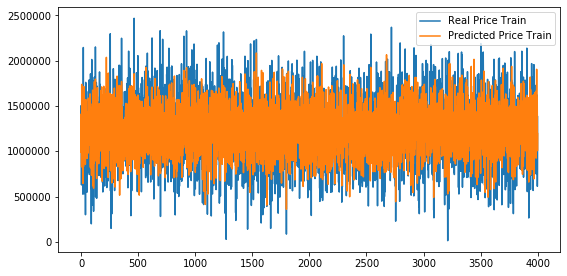

In [21]:
fig = plt.figure(figsize = (9, 4.5))
plt.plot(Price_Train, label = 'Real Price Train')
plt.plot(PPrice_Train, label = 'Predicted Price Train')
plt.legend()
plt.show()

In [22]:
print(f'The training error is apporximately {round(Error_Train, 2)} %')

The training error is apporximately 20.79 %


# 4. Model Testing

In [23]:
W

array([[-1.12892799e+06],
       [ 1.61982522e+05],
       [ 1.17468942e+05],
       [ 8.26261290e+03],
       [ 1.49221338e+01]])

In [24]:
PPrice_Test = SMK.MR_find_Yhat(Feature_Test, W)

In [25]:
Error_Test = SMK.find_error(Price_Test, PPrice_Test, 'MAPE')

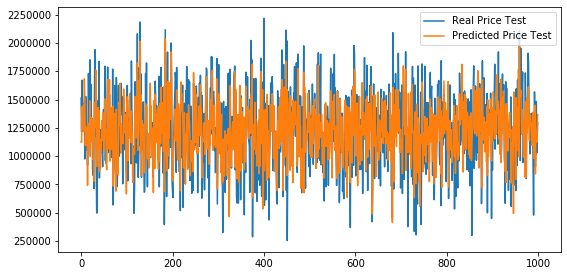

In [26]:
fig = plt.figure(figsize = (9, 4.5))
plt.plot(Price_Test, label = 'Real Price Test')
plt.plot(PPrice_Test, label = 'Predicted Price Test')
plt.legend()
plt.show()

In [27]:
print(f'The tested model error is approximately {round(Error_Test, 2)} %')

The tested model error is approximately 19.09 %


# 5. Prediction

In [28]:
AHA = int(input('How many house years old? '))
AR = int(input('How many rooms in the house? '))
AB = int(input('How many bedrooms in the house? '))
AP = int(input('How large the area population is? '))
DataForPrediction = np.array([[AHA, AR, AB, AP]])
PredictedPrice = SMK.MR_find_Yhat(DataForPrediction, W)
print(f'According from the data input, the house should be priced at {round(PredictedPrice[0][0], 2)} USD')

How many house years old? 5
How many rooms in the house? 5
How many bedrooms in the house? 4
How large the area population is? 50000
According from the data input, the house should be priced at 1047486.47 USD
